<a href="https://colab.research.google.com/github/Sheega-ameenah/Data_Science/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = [
    'T-shirt/top','Trouser','Pullover','Dress','Coat',
    'Sandal','Shirt','Sneaker','Bag','Ankle boot'
]

## Data reshape

In [5]:
X_train_full= X_train_full.reshape((60000,28,28,1))
X_test = X_test.reshape((10000,28,28,1))

## Data normalization

we then normalize the data dimensions so that they are of approximately the same scale

In [6]:
X_train_n= X_train_full/225
X_test_n= X_test/225

## train-test-split

In [7]:
X_valid,X_train= X_train_n[:5000], X_train_n[5000:]
y_valid,y_train= y_train_full[:5000],y_train_full[5000:]
X_test= X_test_n

## Create model architecture

In [8]:
np.random.seed(42)
tf.random.set_seed(42)

## Architecture

In [10]:
from keras.src.layers.serialization import activation
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters= 32,kernel_size=(3,3), strides=1, padding='valid',activation= 'relu',input_shape= (28,28,1)))
model.add(keras.layers.MaxPool2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))


In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 300)               1622700   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                      

In [12]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics=['accuracy'])

In [13]:
model_history = model.fit(X_train,y_train, epochs= 10, batch_size= 64,
                          validation_data=(X_valid,y_valid))

Epoch 1/10
860/860 [==============================] - 38s 44ms/step - loss: 0.8427 - accuracy: 0.7127 - val_loss: 0.8134 - val_accuracy: 0.7012
Epoch 2/10
860/860 [==============================] - 39s 45ms/step - loss: 0.5224 - accuracy: 0.8113 - val_loss: 0.4836 - val_accuracy: 0.8164
Epoch 3/10
860/860 [==============================] - 35s 40ms/step - loss: 0.4654 - accuracy: 0.8323 - val_loss: 0.9366 - val_accuracy: 0.7078
Epoch 4/10
860/860 [==============================] - 37s 43ms/step - loss: 0.4301 - accuracy: 0.8476 - val_loss: 0.4014 - val_accuracy: 0.8604
Epoch 5/10
860/860 [==============================] - 37s 42ms/step - loss: 0.4064 - accuracy: 0.8543 - val_loss: 0.4002 - val_accuracy: 0.8614
Epoch 6/10
860/860 [==============================] - 36s 41ms/step - loss: 0.3830 - accuracy: 0.8629 - val_loss: 0.3653 - val_accuracy: 0.8750
Epoch 7/10
860/860 [==============================] - 36s 41ms/step - loss: 0.3659 - accuracy: 0.8688 - val_loss: 0.4038 - val_accuracy:

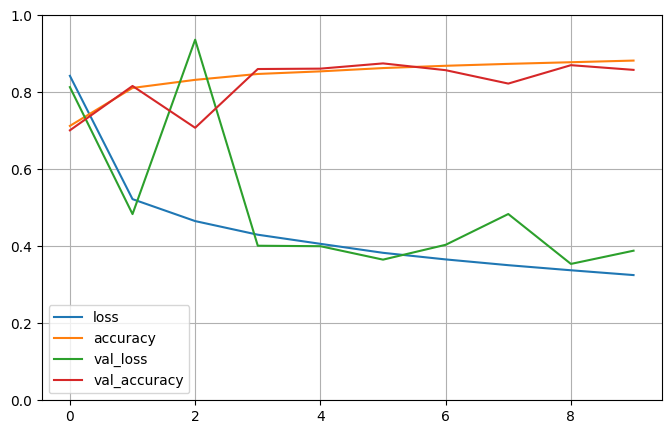

In [14]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [15]:
ev= model.evaluate(X_test_n,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.4278 - accuracy: 0.8397


In [16]:
ev

[0.4278300702571869, 0.8396999835968018]

In [17]:
X_new= X_test[:3]

In [21]:
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 23ms/step


array([[1.0931246e-05, 3.5630837e-05, 1.5634607e-05, 3.4494533e-05,
        5.7467760e-06, 7.8312457e-03, 7.4240372e-05, 2.8137954e-02,
        2.5926512e-03, 9.6126151e-01],
       [1.7338424e-04, 1.5093218e-06, 9.8558182e-01, 6.2374734e-06,
        5.9450540e-04, 5.2854922e-08, 1.3637239e-02, 3.4640529e-10,
        5.2585842e-06, 7.9561346e-08],
       [3.3895749e-06, 9.9998629e-01, 2.8369763e-07, 7.1205673e-06,
        2.6604191e-06, 6.7051648e-10, 1.6648261e-07, 5.6432519e-08,
        2.4065729e-08, 2.8347868e-08]], dtype=float32)